# Checking Time Reversal Symmetry

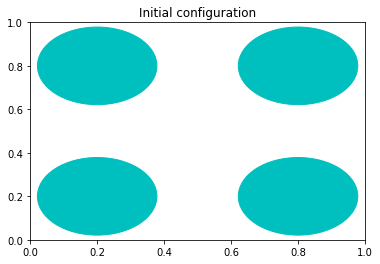

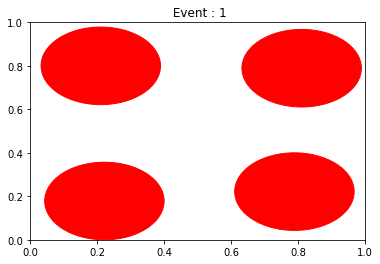

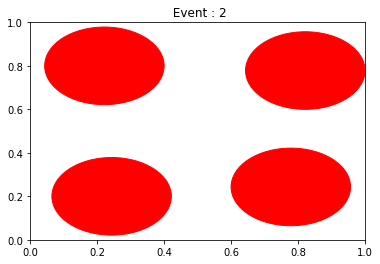

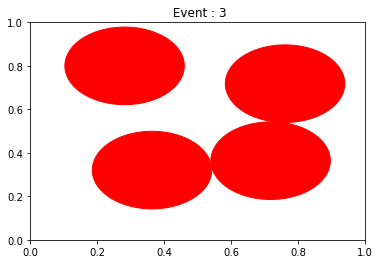

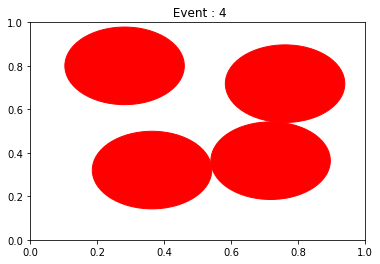

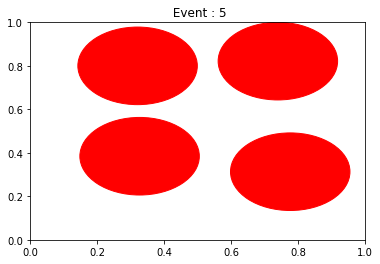

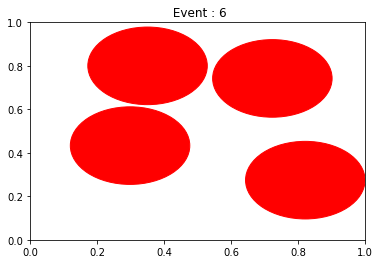

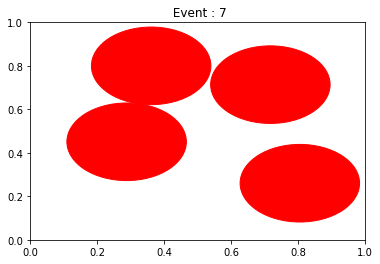

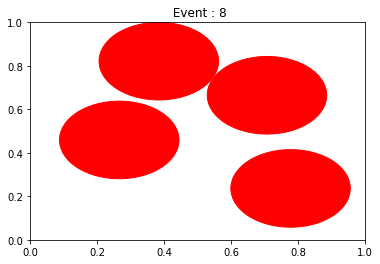

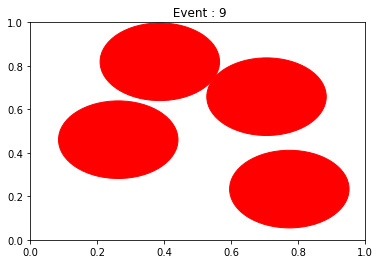

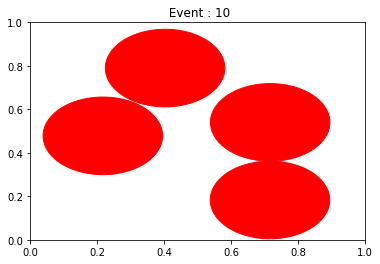

In [1]:
############## Event-DRIVEN COLLISIONS ####################################
###########################################################################

#### This Program simulates the motion of four atoms in a 2D box ######


import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as pt
import pylab




#####  Function to compute time for wall collision ######
def wall_time(coord, velcomp, rad):  
    if velcomp > 0.0:
        del_t = (1.0 - rad - coord) / velcomp
    elif velcomp < 0.0:
        del_t = (coord - rad) / abs(velcomp)
    else:
        del_t = float('inf')
    return del_t


# Function to calculate time it takes for a pair of atoms to collide. 
# pos1 and pos2 are positions of atoms 1 and 2, vel1 and vel2 are their 
# velocities. rad is the radius of the atoms. 
def pair_time(pos1, vel1, pos2, vel2, rad):  
    rel_pos = pos2 - pos1
    rel_vel = vel2 - vel1
    rel_dist_squar = np.dot(rel_pos,rel_pos)
    rel_speed_squar = np.dot(rel_vel,rel_vel)
    scal_prod = np.dot(rel_pos,rel_vel)
    a = scal_prod ** 2 - rel_speed_squar * ( rel_dist_squar - 4.0 * rad **2)
    if a > 0.0 and scal_prod < 0.0: ## Conditions for collision.
        del_t = - (scal_prod + np.sqrt(a)) / rel_speed_squar ## Collision time.
    else:
        del_t = float('inf')
    return del_t


# Function to generate an image of the atomic configuration in the box.

######################### Initialization #################################
L = 1. ## Box edge length
Natoms = 4  # Number of atoms
density = 0.4 # Fraction of area of box occupied by the atoms
Ratom = np.sqrt(density/(Natoms*np.pi))






#### Initial Positions and velocities of the atoms ####

positions = np.array([(0.20,0.20),(0.2,0.8),(0.8,0.2),(0.8,0.8)])
velocities = np.array([(2.0,-2),(1,0),(-1,2),(1,-1)])
                     

fig,ax = plt.subplots()
ax.set_xlim([0,L])
ax.set_ylim([0,L])
ax.set_title("Initial configuration")
for x,y in positions:
    PP = pt.Circle((x,y),radius = Ratom,color = 'c')
    ax.add_patch(PP)
plt.show()

#################################################################################


## List indexing all pairs of atoms.
pairs = [[i,j] for i in range(Natoms) for j in range(i+1, Natoms)] 

## Positions and velocities as numpy arrays.




n_events = 10 # Number of collision iters.

############### Event Loop ##############################################
for iter in range(n_events):
    # Wall collision times for all atoms and their velocity components.
    wall_times = [wall_time(positions[i,j], velocities[i][j], Ratom) for i in range(Natoms) for j in range(2)] 
    # Pair collision times
    pair_times = [pair_time(positions[i], velocities[i], positions[j], velocities[j], Ratom) for i,j in pairs] 
    # The next collision iter is the minimum of wall and pair collision times.

    next_iter = min(wall_times + pair_times)  
    
    for i in range(Natoms):
        positions[i] += velocities[i]*next_iter # Evolve positions to collision iter
    if min(wall_times) < min(pair_times): # Check if next iter is a collision with a wall
        wall_index = wall_times.index(next_iter)
        particle, component = wall_index/2, wall_index%2
        velocities[int(particle),int(component)] *= -1.0 ## Velocity component normal to wall changes sign
    else:
        pair_index = pair_times.index(next_iter)
        particle_1, particle_2 = pairs[pair_index] # Indices of atoms participating in collision.
        rel_pos = positions[particle_2] - positions[particle_1]
        rel_vel = velocities[particle_2] - velocities[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        velocities[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        velocities[particle_2] -= scal_prod*unit_perp
    
    fig,ax = plt.subplots()
    ax.set_xlim([0,L])
    ax.set_ylim([0,L])
    ax.set_title(" Event : " +str(iter+1))
    for x,y in positions:
        PP = pt.Circle((x,y),radius = Ratom,color = 'r')
        ax.add_patch(PP)
    plt.show()
    


########################################################

## Now we will use  the last position array obtained from above simulation and reverse the velocity i.e. we have the configuration of graph labeled  "event 10" . we will see whether we get configuration of " Event : 1" or not

In [2]:
velocities = -1.0*velocities
positions = positions

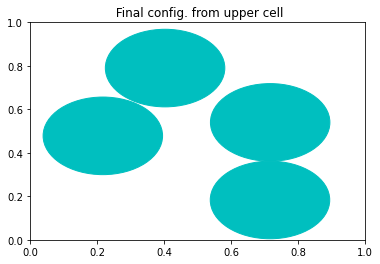

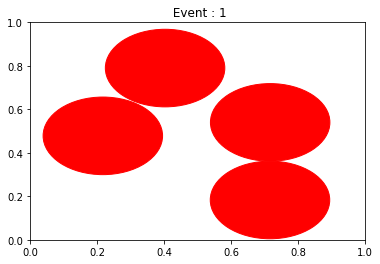

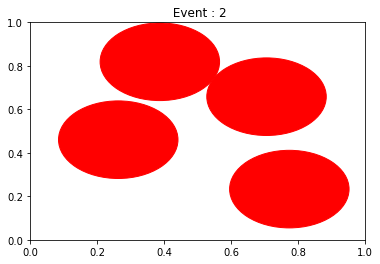

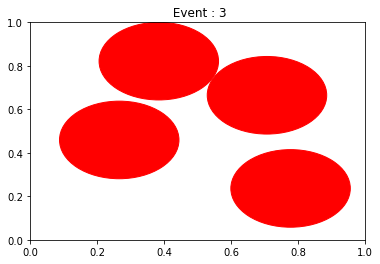

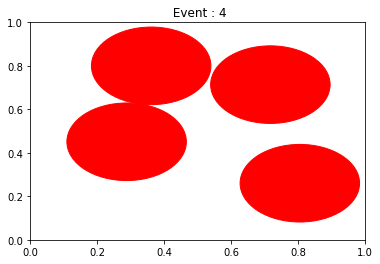

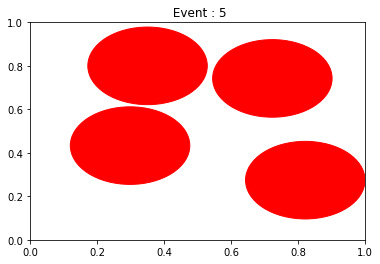

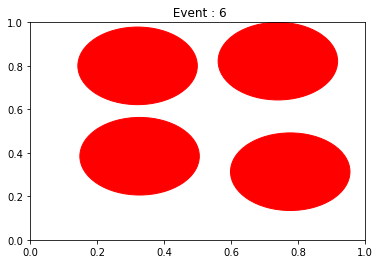

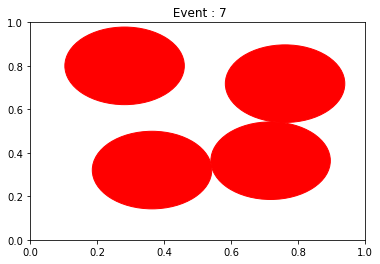

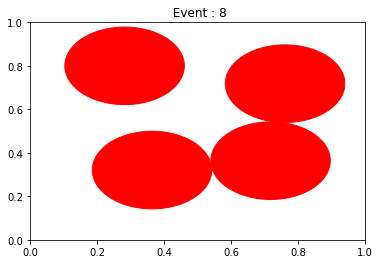

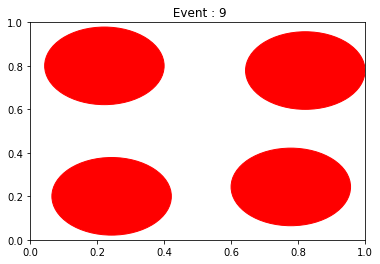

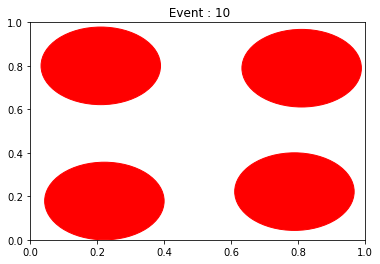

In [3]:

## List indexing all pairs of atoms.
pairs = [[i,j] for i in range(Natoms) for j in range(i+1, Natoms)] 

## Positions and velocities as numpy arrays.


fig,ax = plt.subplots()
ax.set_xlim([0,L])
ax.set_ylim([0,L])
ax.set_title(" Final config. from upper cell" )
for x,y in positions:
    PP = pt.Circle((x,y),radius = Ratom,color = 'c')
    ax.add_patch(PP)
plt.show()

n_events = 10 # Number of collision iters.

############### Event Loop ##############################################
for iter in range(n_events):
    # Wall collision times for all atoms and their velocity components.
    wall_times = [wall_time(positions[i,j], velocities[i][j], Ratom) for i in range(Natoms) for j in range(2)] 
    # Pair collision times
    pair_times = [pair_time(positions[i], velocities[i], positions[j], velocities[j], Ratom) for i,j in pairs] 
    # The next collision iter is the minimum of wall and pair collision times.

    next_iter = min(wall_times + pair_times)  
    
    for i in range(Natoms):
        positions[i] += velocities[i]*next_iter # Evolve positions to collision iter
    if min(wall_times) < min(pair_times): # Check if next iter is a collision with a wall
        wall_index = wall_times.index(next_iter)
        particle, component = wall_index/2, wall_index%2
        velocities[int(particle),int(component)] *= -1.0 ## Velocity component normal to wall changes sign
    else:
        pair_index = pair_times.index(next_iter)
        particle_1, particle_2 = pairs[pair_index] # Indices of atoms participating in collision.
        rel_pos = positions[particle_2] - positions[particle_1]
        rel_vel = velocities[particle_2] - velocities[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        velocities[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        velocities[particle_2] -= scal_prod*unit_perp
    
    fig,ax = plt.subplots()
    ax.set_xlim([0,L])
    ax.set_ylim([0,L])
    ax.set_title(" Event : " +str(iter+1))
    for x,y in positions:
        PP = pt.Circle((x,y),radius = Ratom,color = 'r')
        ax.add_patch(PP)
    plt.show()
    



# VOILA !